In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.style.use('seaborn')

In [2]:
data = pd.read_csv('../processed_data/train_ordinal.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 0)
pd.set_option('display.max_rows', 1450)
data.head()
data.shape

(1460, 84)

In [3]:
num_features = data[data.applymap(np.isreal)==True].dropna(axis=1).columns.tolist()

In [4]:
# correlations between numerical features and SalePrice

from scipy.stats import pearsonr

df = pd.DataFrame(columns=['feature','corr'])

for x in num_features :
    value, _ = pearsonr(data[x], data['SalePrice'])
    df = df.append({'feature':x, 'corr':value}, ignore_index=True)

print('Correlation by Feature:')
display(df.sort_values(by=['corr'], ascending=False))

Correlation by Feature:


,feature,corr
53,SalePrice,1.000000
5,OverallQual,0.790982
25,GrLivArea,0.708624
10,ExterQual,0.682639
32,KitchenQual,0.659600
39,GarageCars,0.640409
40,GarageArea,0.623431
20,TotalBsmtSF,0.613581
22,1stFlrSF,0.605852
12,BsmtQual,0.585207


In [5]:
### Observations for Upgrade Model
# Add a car to your garage for more value (attracting buyers with more cars??)
# Improve Bsmt Qual for more value (attracting families buying a long-term home?)

In [6]:
# TRY THIS AGAIN AFTER SOME FEATURE ENGINEERING!! SPECIFICALLY WITH OUTDOOR SPACE!

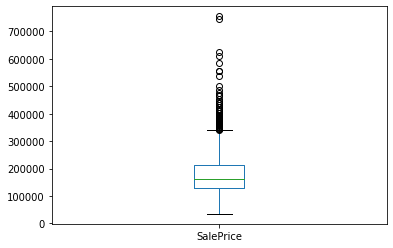

In [7]:
data.plot(x='OverallQual', y='SalePrice', kind='box')

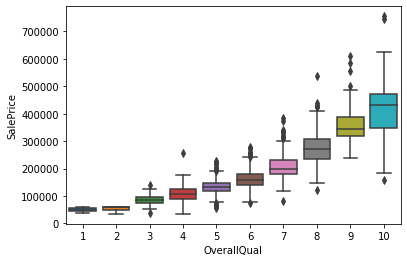

In [8]:
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = data)

Text(0.5, 1.0, 'Price vs Above Ground Living Area')

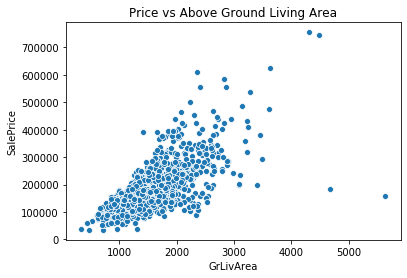

In [24]:
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = data)
plt.title('Price vs Above Ground Living Area')

In [10]:
data[data['GrLivArea']>4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,decade_YearBuilt,decade_YearRemodAdd,decade_GarageYrBlt
523,524,60,rl,130,40094,pave,nothing,ir1,bnk,allpub,inside,3,edwards,posn,posn,1fam,2story,10,5,2007,2008,hip,compshg,cemntbd,cmentbd,stone,762,5,3,pconc,5,3,4,6,2260,1,0,878,3138,gasa,5,y,sbrkr,3138,1538,0,4676,1,0,3,1,3,1,5,11,8,1,4,builtin,2007,3,3,884,3,3,y,208,406,0,0,0,0,0,nothing,nothing,0,10,2007,new,partial,184750,10,10,10
691,692,60,rl,104,21535,pave,nothing,ir1,lvl,allpub,corner,3,noridge,norm,norm,1fam,2story,10,6,1994,1995,gable,wdshngl,hdboard,hdboard,brkface,1170,5,3,pconc,5,3,4,6,1455,1,0,989,2444,gasa,5,y,sbrkr,2444,1872,0,4316,0,1,3,1,4,1,5,10,8,2,5,attchd,1994,3,3,832,3,3,y,382,50,0,0,0,0,0,nothing,nothing,0,1,2007,wd,normal,755000,9,9,9
1182,1183,60,rl,160,15623,pave,nothing,ir1,lvl,allpub,corner,3,noridge,norm,norm,1fam,2story,10,5,1996,1996,hip,compshg,wd sdng,imstucc,nothing,0,4,3,pconc,5,3,3,6,2096,1,0,300,2396,gasa,5,y,sbrkr,2411,2065,0,4476,1,0,3,1,4,1,5,10,8,2,3,attchd,1996,3,3,813,3,3,y,171,78,0,0,0,555,5,mnprv,nothing,0,7,2007,wd,abnorml,745000,9,9,9
1298,1299,60,rl,313,63887,pave,nothing,ir3,bnk,allpub,corner,3,edwards,feedr,norm,1fam,2story,10,5,2008,2008,hip,clytile,stucco,stucco,stone,796,5,3,pconc,5,3,4,6,5644,1,0,466,6110,gasa,5,y,sbrkr,4692,950,0,5642,2,0,2,1,3,1,5,12,8,3,4,attchd,2008,3,2,1418,3,3,y,214,292,0,0,0,480,4,nothing,nothing,0,1,2008,new,partial,160000,10,10,10


In [11]:
# Actual ID field (not index) = 524 and 1299
# OUTLIERS!! Big, high quality houses built in iffy neighborhood. Sold for partial condition.
# Late 2007, Early 2008

In [12]:
data_no_outlier = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
data_no_outlier.shape

(1458, 84)

In [13]:
df = pd.DataFrame(columns=['feature','corr'])

for x in num_features :
    value, _ = pearsonr(data_no_outlier[x], data_no_outlier['SalePrice'])
    df = df.append({'feature':x, 'corr':value}, ignore_index=True)

print('Correlation by Feature:')
display(df.sort_values(by=['corr'], ascending=False))

Correlation by Feature:


,feature,corr
53,SalePrice,1.000000
5,OverallQual,0.795774
25,GrLivArea,0.734968
10,ExterQual,0.686756
32,KitchenQual,0.662236
20,TotalBsmtSF,0.651153
39,GarageCars,0.641047
22,1stFlrSF,0.631530
40,GarageArea,0.629217
12,BsmtQual,0.586674


Text(0.5, 0, '')

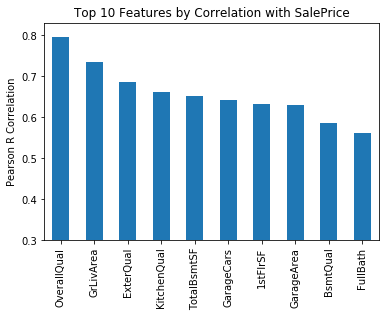

In [14]:
df.sort_values(by=['corr'], ascending=False)[1:].head(10).plot.bar(x='feature', y='corr', legend=False)
plt.title('Top 10 Features by Correlation with SalePrice')
plt.ylabel('Pearson R Correlation')
plt.ylim(.3,.83)
plt.xlabel('')

In [15]:
edwards = data[data['Neighborhood']=='edwards']

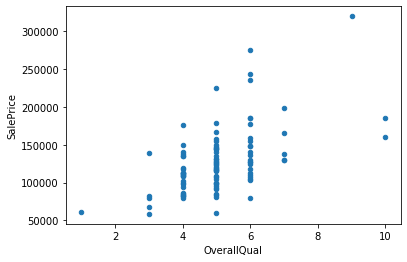

In [16]:
edwards.plot(x='OverallQual', y='SalePrice', kind='scatter')

In [17]:
edwards.sort_values('OverallQual', ascending=False)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,decade_YearBuilt,decade_YearRemodAdd,decade_GarageYrBlt
523,524,60,rl,130,40094,pave,nothing,ir1,bnk,allpub,inside,3,edwards,posn,posn,1fam,2story,10,5,2007,2008,hip,compshg,cemntbd,cmentbd,stone,762,5,3,pconc,5,3,4,6,2260,1,0,878,3138,gasa,5,y,sbrkr,3138,1538,0,4676,1,0,3,1,3,1,5,11,8,1,4,builtin,2007,3,3,884,3,3,y,208,406,0,0,0,0,0,nothing,nothing,0,10,2007,new,partial,184750,10,10,10
1298,1299,60,rl,313,63887,pave,nothing,ir3,bnk,allpub,corner,3,edwards,feedr,norm,1fam,2story,10,5,2008,2008,hip,clytile,stucco,stucco,stone,796,5,3,pconc,5,3,4,6,5644,1,0,466,6110,gasa,5,y,sbrkr,4692,950,0,5642,2,0,2,1,3,1,5,12,8,3,4,attchd,2008,3,2,1418,3,3,y,214,292,0,0,0,480,4,nothing,nothing,0,1,2008,new,partial,160000,10,10,10
724,725,20,rl,86,13286,pave,nothing,ir1,lvl,allpub,inside,3,edwards,norm,norm,1fam,1story,9,5,2007,2008,hip,compshg,cemntbd,cmentbd,stone,340,5,3,pconc,5,3,1,6,1234,1,0,464,1698,gasa,5,y,sbrkr,1698,0,0,1698,1,0,2,0,3,1,5,8,8,1,4,attchd,2007,3,3,768,3,3,y,327,64,0,0,0,0,0,nothing,nothing,0,2,2009,wd,normal,320000,10,10,10
362,363,85,rl,64,7301,pave,nothing,reg,lvl,allpub,corner,3,edwards,norm,norm,1fam,sfoyer,7,5,2003,2003,gable,compshg,hdboard,hdboard,brkface,500,4,3,slab,0,0,0,0,0,0,0,0,0,gasa,5,y,sbrkr,495,1427,0,1922,0,0,3,0,4,1,4,7,8,1,5,builtin,2003,2,2,672,3,3,y,0,0,177,0,0,0,0,nothing,nothing,0,7,2009,conld,normal,198500,10,10,10
193,194,160,rm,24,2522,pave,nothing,reg,lvl,allpub,inside,3,edwards,norm,norm,twnhs,2story,7,5,2004,2004,gable,compshg,vinylsd,vinylsd,stone,50,4,3,pconc,4,3,1,1,0,1,0,970,970,gasa,5,y,sbrkr,970,739,0,1709,0,0,2,0,3,1,4,7,4,0,0,detchd,2004,1,2,380,3,3,y,0,40,0,0,0,0,0,nothing,nothing,0,5,2006,wd,normal,130000,10,10,10
1254,1255,60,rl,60,6931,pave,nothing,reg,lvl,allpub,inside,3,edwards,norm,norm,1fam,2story,7,5,2003,2004,gable,compshg,vinylsd,vinylsd,stone,92,4,3,pconc,4,3,1,1,0,1,0,746,746,gasa,5,y,sbrkr,760,896,0,1656,0,0,2,1,3,1,4,7,8,1,4,builtin,2003,3,2,397,3,3,y,178,128,0,0,0,0,0,nothing,nothing,0,7,2008,wd,normal,165400,10,10,10
1088,1089,160,rm,24,2522,pave,nothing,reg,lvl,allpub,inside,3,edwards,norm,norm,twnhs,2story,7,5,2004,2004,gable,compshg,vinylsd,vinylsd,stone,50,4,3,pconc,4,3,1,1,0,1,0,970,970,gasa,5,y,sbrkr,970,739,0,1709,0,0,2,0,3,1,4,7,4,0,0,detchd,2004,1,2,380,3,3,y,0,40,0,0,0,0,0,nothing,nothing,0,4,2006,wd,normal,137500,10,10,10
1304,1305,160,rm,32,3363,pave,nothing,reg,lvl,allpub,inside,3,edwards,norm,norm,twnhse,2story,7,5,2004,2004,gable,compshg,vinylsd,vinylsd,stone,117,4,3,pconc,4,3,1,1,0,1,0,976,976,gasa,5,y,sbrkr,976,732,0,1708,0,0,2,0,3,1,4,7,4,0,0,detchd,2004,1,2,380,3,3,y,0,40,0,0,0,0,0,nothing,nothing,0,4,2006,wd,normal,130000,10,10,10
387,388,80,rl,72,7200,pave,nothing,reg,lvl,allpub,inside,3,edwards,norm,norm,1fam,slvl,6,6,1976,1976,hip,compshg,metalsd,metalsd,brkface,255,3,3,cblock,3,3,3,5,631,1,0,410,1041,gasa,5,y,sbrkr,1125,0,0,1125,1,0,1,0,3,1,3,6,8,1,2,detchd,1977,1,1,352,3,3,y,296,0,0,0,0,0,0,gdwo,nothing,0,10,2009,wd,abnorml,125000,7,7,7
1168,1169,70,rl,120,13728,pave,nothing,reg,lvl,allpub,corner,3,edwards,norm,norm,1fam,2story,6,7,1935,1986,hip,compshg,stucco,stucco,nothing,0,3,3,cblock,3,3,1,3,626,1

In [18]:
data.groupby('YrSold')['SalePrice'].median()

YrSold
2006    163995
2007    167000
2008    164000
2009    162000
2010    155000
Name: SalePrice, dtype: int64

In [27]:
data['SaleCondition'].value_counts()

normal     1198
partial     125
abnorml     101
family       20
alloca       12
adjland       4
Name: SaleCondition, dtype: int64

In [21]:
### BOXPLOTS AND BARGRAPHS FOR EACH NEIGHBORHOOD

In [22]:
hoods = data.groupby('Neighborhood')['SalePrice'].agg(['mean','median']).sort_values('median', ascending=False)
hoods

,mean,median
Neighborhood,,
nridght,316270.623377,315000
noridge,335295.317073,301500
stonebr,310499.000000,278000
timber,242247.447368,228475
somerst,225379.837209,225500
veenker,238772.727273,218000
crawfor,210624.725490,200624
clearcr,212565.428571,200250
collgcr,197965.773333,197200


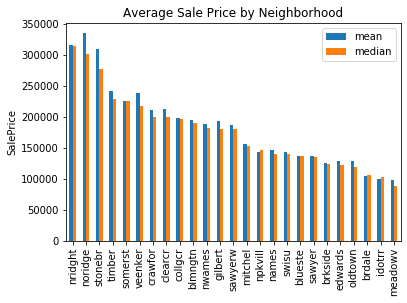

In [25]:
hoods.plot.bar()
plt.ylabel('SalePrice')
plt.xlabel('')
plt.title('Average Sale Price by Neighborhood')
plt.show()